Importing the Required Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('../dataset/BigBasket Products.csv', index_col='index')

In [3]:
df 

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...


In [4]:
df.shape

(27555, 9)

In [5]:
df.describe()

,sale_price,market_price,rating
count,27555.000000,27555.000000,18929.000000
mean,322.514808,382.056664,3.943410
std,486.263116,581.730717,0.739063
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27555 entries, 1 to 27555
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
print('Null percentage for each column', end="\n\n")

total_count = df.shape[0]

for col in df.columns:
    null_count = df[col].isnull().sum()
    print("{} : {:.2f}".format(col, null_count/total_count * 100))

Null percentage for each column

product : 0.00
category : 0.00
sub_category : 0.00
brand : 0.00
sale_price : 0.00
market_price : 0.00
type : 0.00
rating : 31.30
description : 0.42


In [9]:
print('total null data')
null_count = df.isnull().sum().sum()

total_count = df.size 

print("{:.2f}".format(null_count/total_count * 100))

total null data
3.53


3% data is missing in the entire dataset

so dropping the missing data

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [12]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18840 entries, 1 to 27555
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       18840 non-null  object 
 1   category      18840 non-null  object 
 2   sub_category  18840 non-null  object 
 3   brand         18840 non-null  object 
 4   sale_price    18840 non-null  float64
 5   market_price  18840 non-null  float64
 6   type          18840 non-null  object 
 7   rating        18840 non-null  float64
 8   description   18840 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [14]:
cat_column = df.select_dtypes(include='object')

In [15]:
for col in cat_column.columns:
    print(f" {col} : {cat_column[col].unique()}", end='\n\n')

 product : ['Garlic Oil - Vegetarian Capsule 500 mg' 'Water Bottle - Orange'
 'Brass Angle Deep - Plain, No.2' ...
 'Wottagirl! Perfume Spray - Heaven, Classic'
 'Peri-Peri Sweet Potato Chips' 'Green Tea - Pure Original']

 category : ['Beauty & Hygiene' 'Kitchen, Garden & Pets' 'Cleaning & Household'
 'Gourmet & World Food' 'Foodgrains, Oil & Masala'
 'Snacks & Branded Foods' 'Beverages' 'Bakery, Cakes & Dairy' 'Baby Care']

 sub_category : ['Hair Care' 'Storage & Accessories' 'Pooja Needs' 'Bins & Bathroom Ware'
 'Bath & Hand Wash' 'All Purpose Cleaners' 'Skin Care'
 'Mops, Brushes & Scrubs' 'Cooking & Baking Needs' 'Chocolates & Biscuits'
 'Fresheners & Repellents' 'Snacks, Dry Fruits, Nuts' 'Dairy & Cheese'
 'Pasta, Soup & Noodles' 'Dry Fruits' 'Drinks & Beverages'
 'Kitchen Accessories' 'Flask & Casserole' 'Breakfast Cereals'
 'Frozen Veggies & Snacks' 'Fruit Juices & Drinks' 'Cookies, Rusk & Khari'
 'Fragrances & Deos' 'Tea' 'Masalas & Spices' "Men's Grooming"
 'Chocolates & Cand

# Exploratoy Data Analysis

/home/trainee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


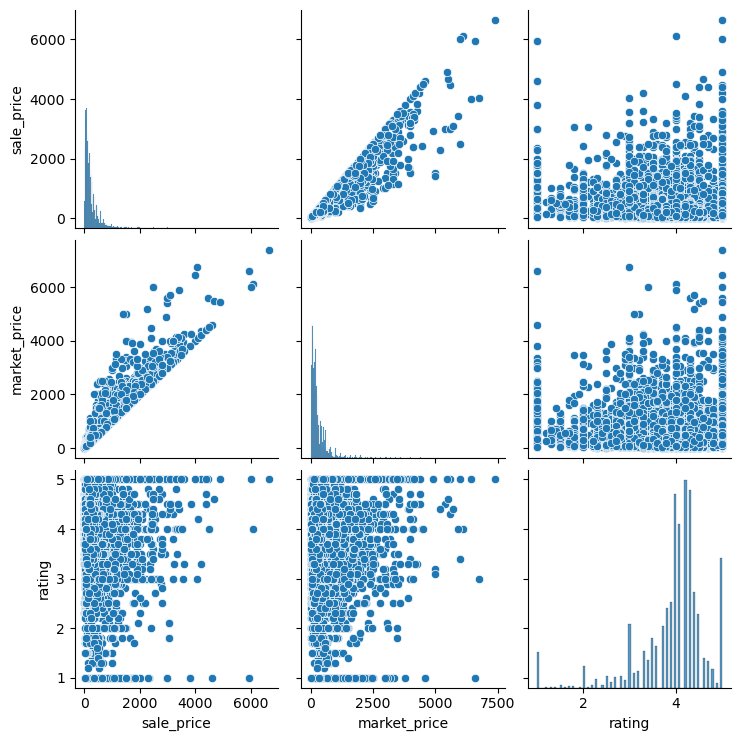

In [16]:
sns.pairplot(data=df)

In [17]:
counts = df['category'].value_counts()

counts_df = pd.DataFrame({'Category': counts.index, 'Counts': counts.values})

In [18]:
!pip install plotly

In [19]:
import plotly.express as px

In [20]:
px.bar(data_frame=counts_df, x='Category', 
       y='Counts',
       color='Counts',
       color_continuous_scale='blues',
       title='Counts of Items for all category')

### Top 15 Sub Category

In [22]:
counts = df['sub_category'].value_counts()
counts_df = pd.DataFrame({'Sub-Category': counts.index, 'Counts':counts.values})[:10]


px.bar(data_frame=counts_df,
       x='Sub-Category',
       y='Counts',
       color='Counts',
       color_continuous_scale='blues',
       text_auto=True,
       title='Top 15 Bought Sub-Categories')

### Top 10 Brands based on number of products

In [23]:
df['brand'].value_counts()

brand
bb Royal     278
BB Home      172
Amul         153
Himalaya     139
Cello        104
            ... 
Fazlani        1
Fakira         1
Sofia          1
Dr. Schar      1
4700BC         1
Name: count, Length: 1933, dtype: int64

In [24]:
counts = df['brand'].value_counts()
counts_df = pd.DataFrame({'Brand': counts.index, 'Counts': counts.values})[:10]

px.bar(data_frame=counts_df,
       x='Brand',
       y='Counts',
       color='Counts',
       text_auto=True,
       color_continuous_scale='Blues',
       title='Top 10 brands based on product count')

In [31]:
!pip install pandas-profiling
!pip install ydata_profiling

  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/0a/cb/d946b8ab543dfcd6cdf66eb3dfe1d6b39dfdede57b3c8e9115822b3c7bee/ydata_profiling-4.6.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/0a/2b/64066de1c4cf3d4ed623beeb3bbf3f8d0cc26661f1e7d180ec5eb66b75a5/pydantic-2.5.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 613.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.8 MB/s eta 0:00:0000:01
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://files.pythonhosted.org/packages/18/01/5fc45558268ced46d86292763477996a3cdd505567cd590a688e8cdc386e/typeguard-4.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/22/8c/18556cbe48b6d2e03d6bb1001ef79b9255c767d2927addcf090b700a1de9/wordcloud-1.9.2-cp31

In [32]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

/tmp/ipykernel_11307/4001871067.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
df.to_csv('cleaned_data.csv', index=False)